## Exploratory Data Analysis  
### Разведочный анализ данных

-----------  
<font color=blue size=5>Predicting the final properties of new materials (composite materials)</font>  
<font color=blue size=4>Прогнозирование конечных свойств новых материалов (композиционных материалов)</font>  
___________

### 1. Dataset description

На входе имеются данные о начальных свойствах компонентов композиционных материалов:  
- cоотношение матрица-наполнитель  
- плотность, кг/м<sup>3</sup> ?  
- количество отвердителя, м.%  
- содержание эпоксидных групп, %_2  
- температура вспышки, С_2 (температурный режим отверждения)  
- поверхностная плотность, г/м<sup>2</sup>  ?  
- потребление смолы, г/м<sup>2</sup>  
- угол нашивки, град  
- шаг нашивки  
- плотность нашивки

На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов:  
- модуль упругости, ГПа  
- модуль упругости при растяжении, ГПа  
- прочность при растяжении, МПа

### 1. Описание датасета

We have the data with the initial properties of the components of composite materials:  
- matrix-filler ratio  
- density, kg/m<sup>3</sup> ?  
*- количество отвердителя, м.%  
*- содержание эпоксидных групп, %_2  
*- температура вспышки, С_2 (температурный режим отверждения)  
*- поверхностная плотность, г/м2  ?  
*- потребление смолы, г/м2  
*- угол нашивки, град  
*- шаг нашивки  
*- плотность нашивки

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


### 2. Data loading

In [2]:
# Загрузим только первые 40 строк
X_bp = pd.read_excel('../../data/raw/X_bp.xlsx', index_col=0, nrows=40)
X_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
# Загрузим только первые 40 строк
X_nup = pd.read_excel('../../data/raw/X_nup.xlsx', index_col=0, nrows=40)
X_nup
# выбросить строку 19

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4,57
1,0,4,60
2,0,4,70
3,0,5,47
4,0,5,57
5,0,5,60
6,0,5,70
7,0,7,47
8,0,7,57
9,0,7,60


In [4]:
# joining to single dataframe
data = X_bp.merge(X_nup, how='inner', left_index=True, right_index=True)
len(data.columns)

13

### 3. Initial Analysis

In [5]:
# put target columns to the right part of dataframe

data = data[['Количество отвердителя, м.%',
             'Содержание эпоксидных групп,%_2',
             'Температура вспышки, С_2',
             'Потребление смолы, г/м2',
             'Угол нашивки, град',
             'Шаг нашивки',
             'Плотность нашивки',
             'Плотность, кг/м3',
             'Поверхностная плотность, г/м2',
             'Модуль упругости, ГПа',
             'Соотношение матрица-наполнитель',
             'Модуль упругости при растяжении, ГПа',
             'Прочность при растяжении, МПа']]
len(data.columns)   # sanity check

13

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Количество отвердителя, м.%           40 non-null     float64
 1   Содержание эпоксидных групп,%_2       40 non-null     float64
 2   Температура вспышки, С_2              40 non-null     float64
 3   Потребление смолы, г/м2               40 non-null     float64
 4   Угол нашивки, град                    40 non-null     int64  
 5   Шаг нашивки                           40 non-null     int64  
 6   Плотность нашивки                     40 non-null     int64  
 7   Плотность, кг/м3                      40 non-null     float64
 8   Поверхностная плотность, г/м2         40 non-null     float64
 9   Модуль упругости, ГПа                 40 non-null     float64
 10  Соотношение матрица-наполнитель       40 non-null     float64
 11  Модуль упругости при 

In [7]:
# NaN-values
data.isna().sum().sum()

0

In [8]:
# duplicate rows
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
"Количество отвердителя, м.%",40.0,112.488835,28.453910,30.000000,108.376380,120.430000,129.000000,149.372832
"Содержание эпоксидных групп,%_2",40.0,22.599959,2.284052,17.874100,21.250000,22.267857,23.175744,33.000000
"Температура вспышки, С_2",40.0,291.233848,40.586251,100.000000,284.615385,300.000000,300.000000,357.972896
"Потребление смолы, г/м2",40.0,212.068096,54.703508,120.000000,185.445669,220.000000,231.320349,300.000000
"Угол нашивки, град",40.0,45.000000,45.573272,0.000000,0.000000,45.000000,90.000000,90.000000
Шаг нашивки,40.0,6.900000,2.519666,0.000000,5.000000,7.000000,9.000000,10.000000
Плотность нашивки,40.0,57.325000,12.325474,0.000000,54.500000,58.500000,62.500000,70.000000
"Плотность, кг/м3",40.0,1969.810420,73.536838,1813.234600,1910.000000,1975.484072,2030.000000,2160.000000
"Поверхностная плотность, г/м2",40.0,495.934107,275.139640,117.535234,210.000000,470.000000,603.888352,1010.000000
"Модуль упругости, ГПа",40.0,793.464589,344.647852,205.000000,538.750000,750.500000,931.732977,1628.000000


In [10]:
data.nunique()

Количество отвердителя, м.%             22
Содержание эпоксидных групп,%_2         21
Температура вспышки, С_2                20
Потребление смолы, г/м2                 20
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
Плотность, кг/м3                        30
Поверхностная плотность, г/м2           21
Модуль упругости, ГПа                   37
Соотношение матрица-наполнитель         31
Модуль упругости при растяжении, ГПа    21
Прочность при растяжении, МПа           21
dtype: int64

### 4. Data Analysis

In [11]:
# Distributions for each variable

Распределение почти всех признаков выглядит нормальным, за исключением трех преременных. Распределение поверхностной плотности и модуля упругости несколько скошены влево, а угол нашивки имеет строго два параметра, 0<sup>o</sup> или 90<sup>o</sup>.

<font size=4>Посмотреть в литературе имеют ли подобные признаки скошенное распределение</font>  
Модуль упругости при растяжении обязательно нужно нормализовать

In [12]:
# Функция...

def diagnostic_plots(df, variable):   # вынести в отдельный файл?
    plt.figure(figsize=(14,4))
    # гистограмма
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=26)
    plt.title(variable)
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 3, 3)
    sns.boxplot(x=data[variable])
    plt.show()
    print()

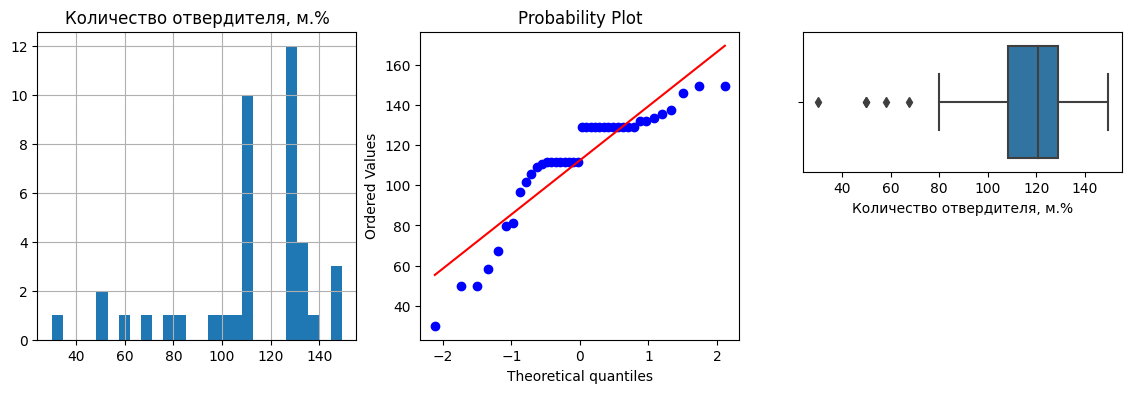

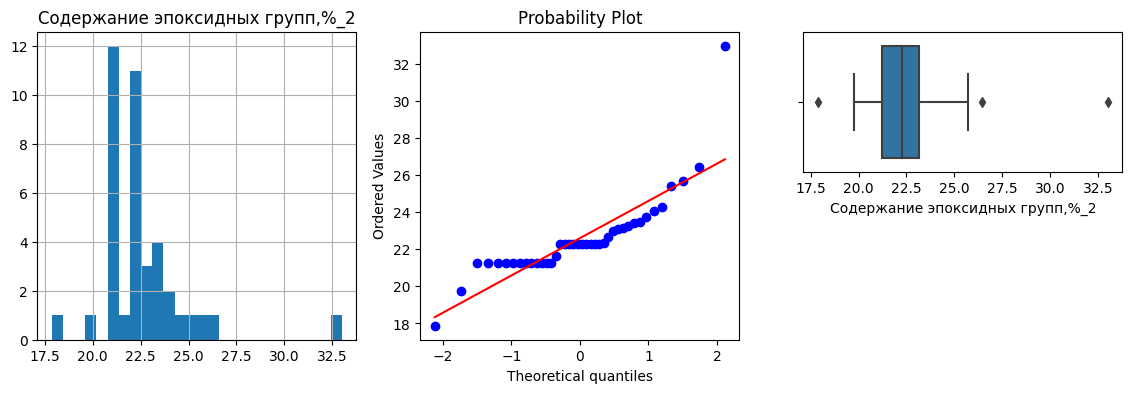

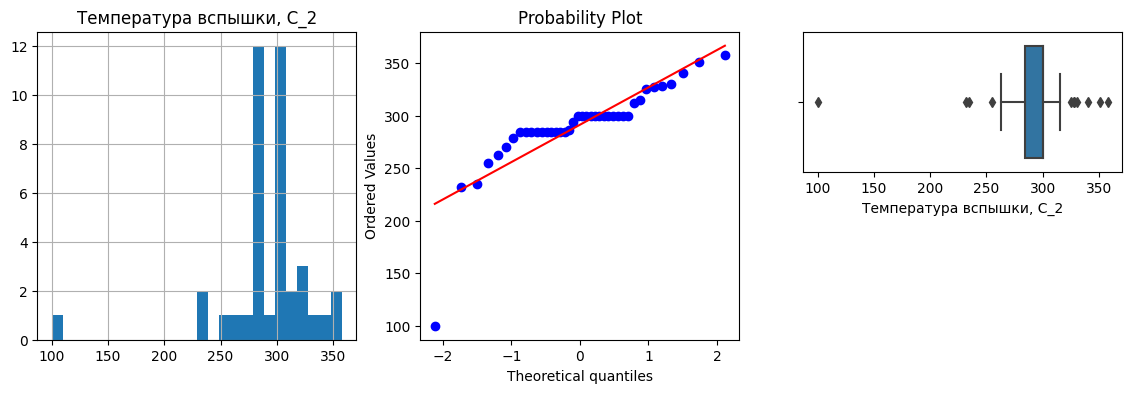

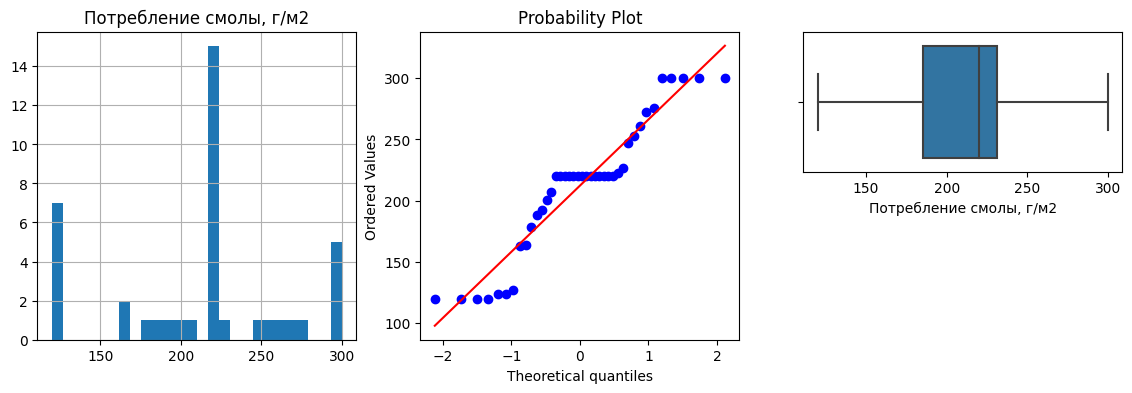

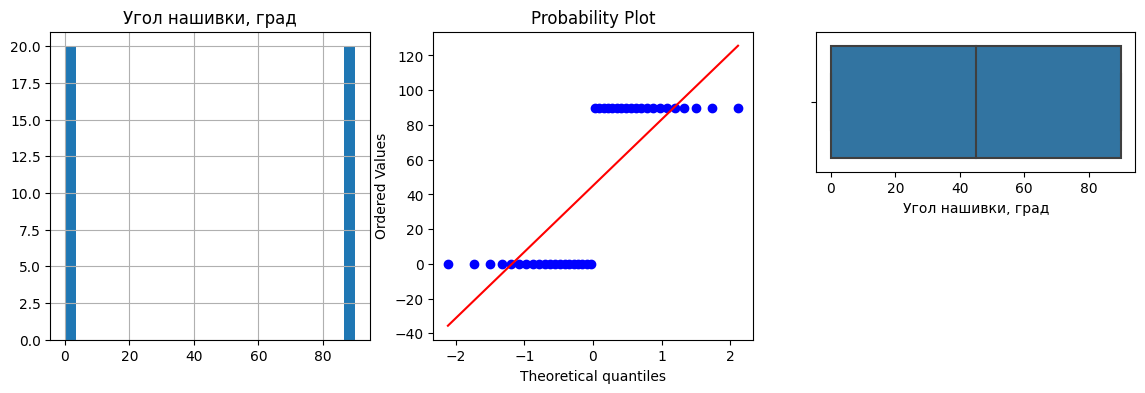

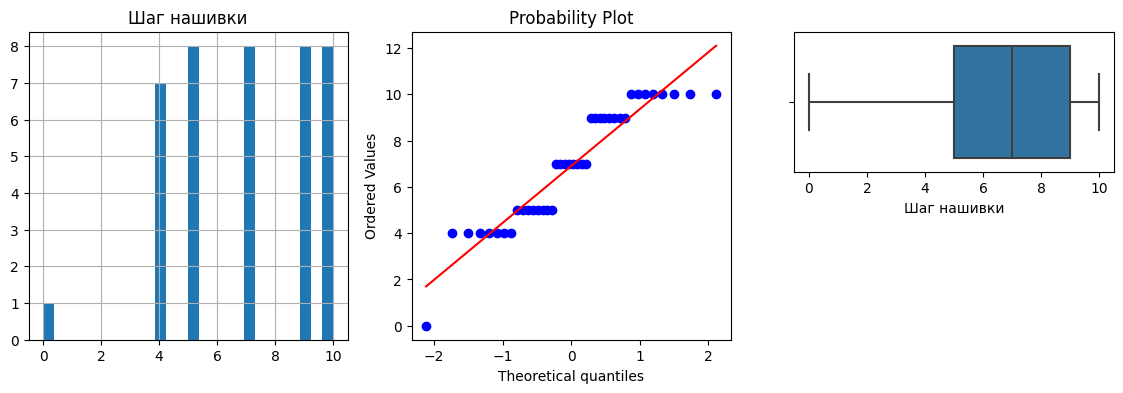

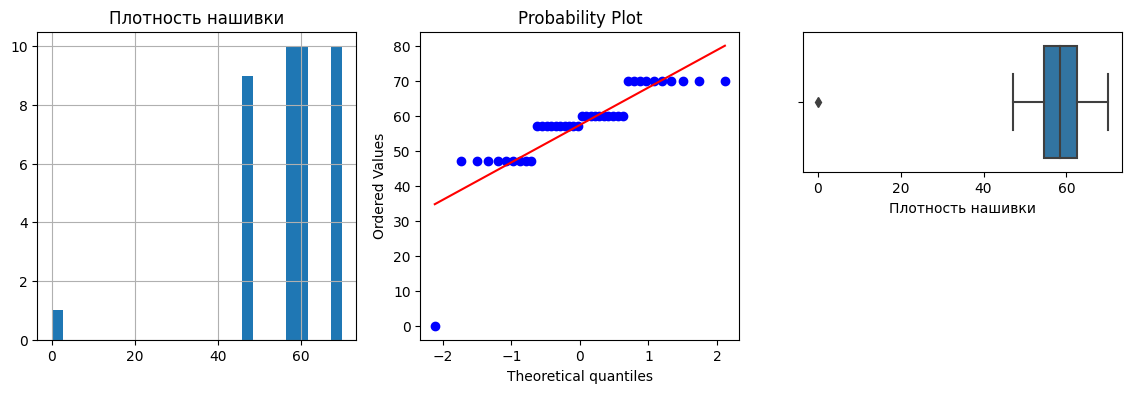

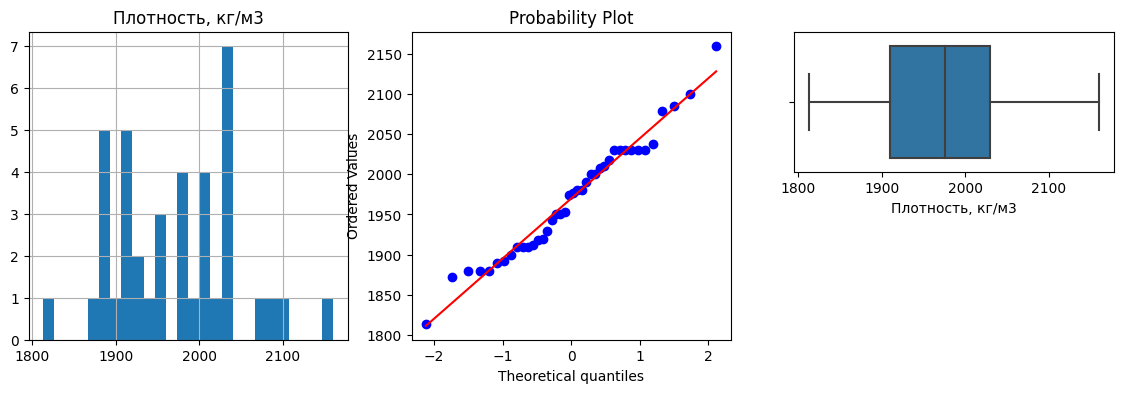

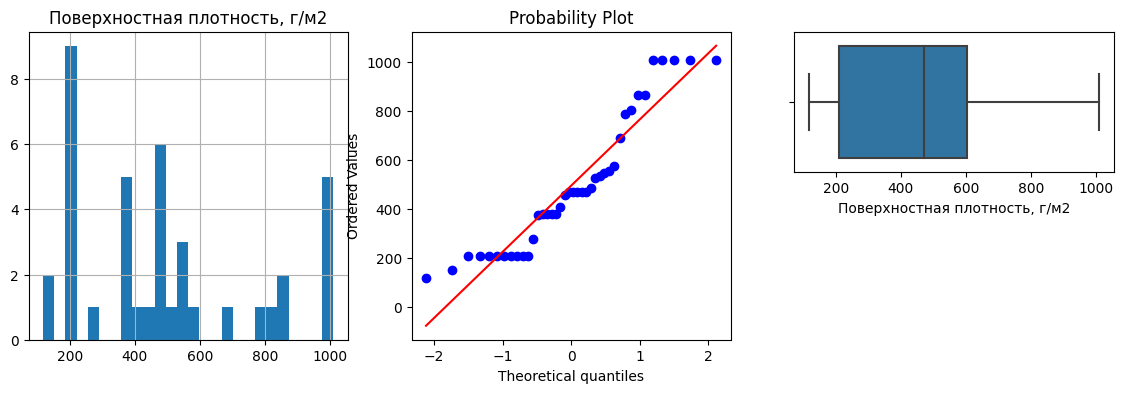

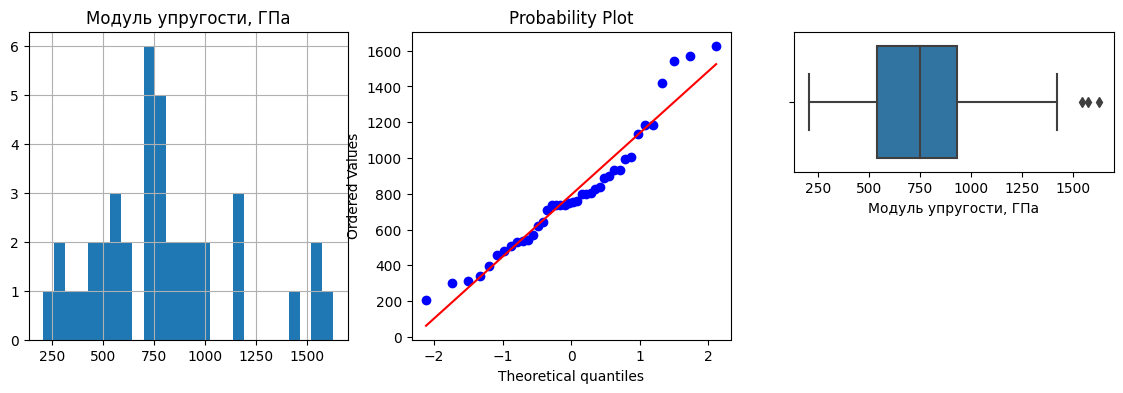

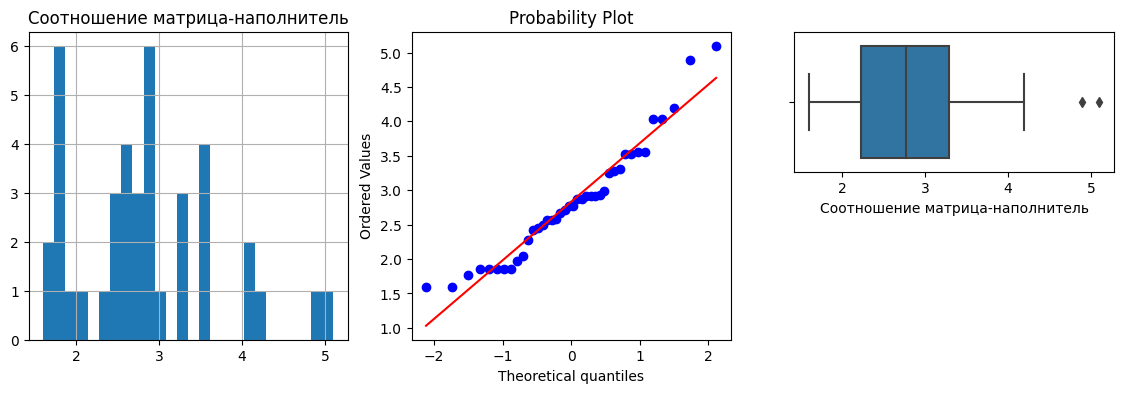

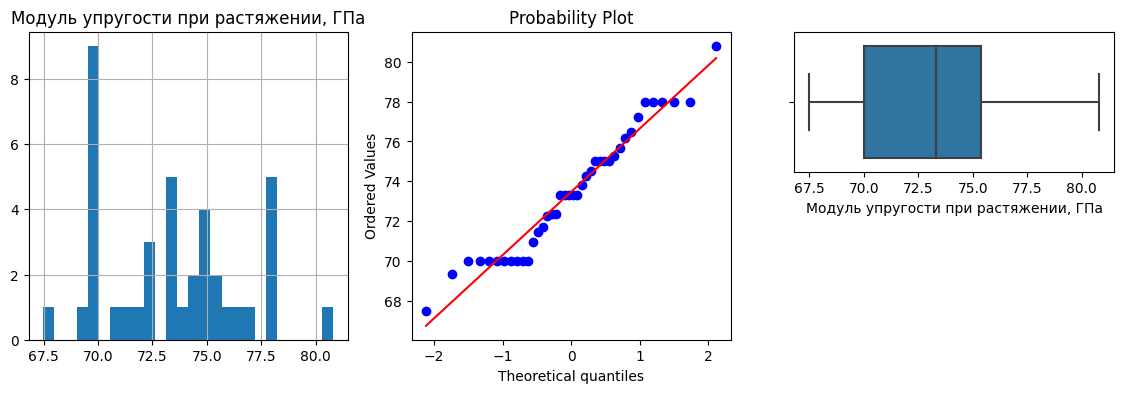

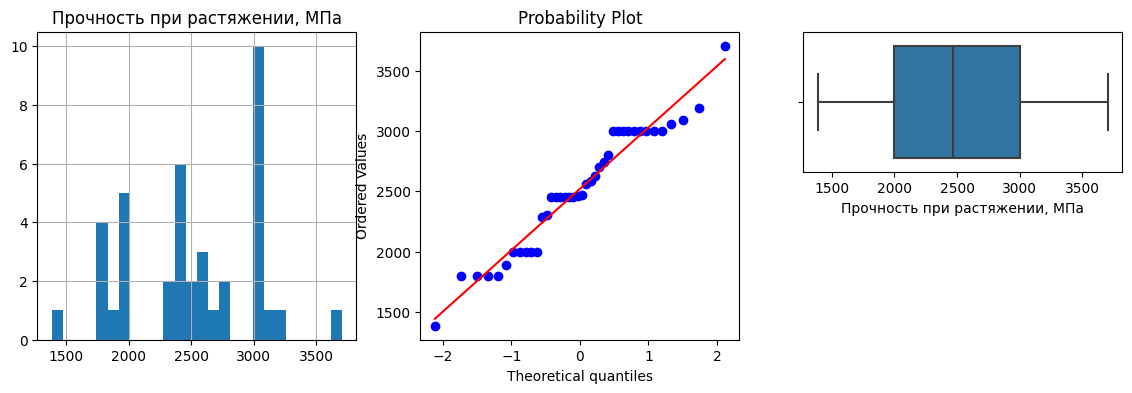

In [13]:
#объединить в одну функцию
for column in data.columns:
    diagnostic_plots(data, column)

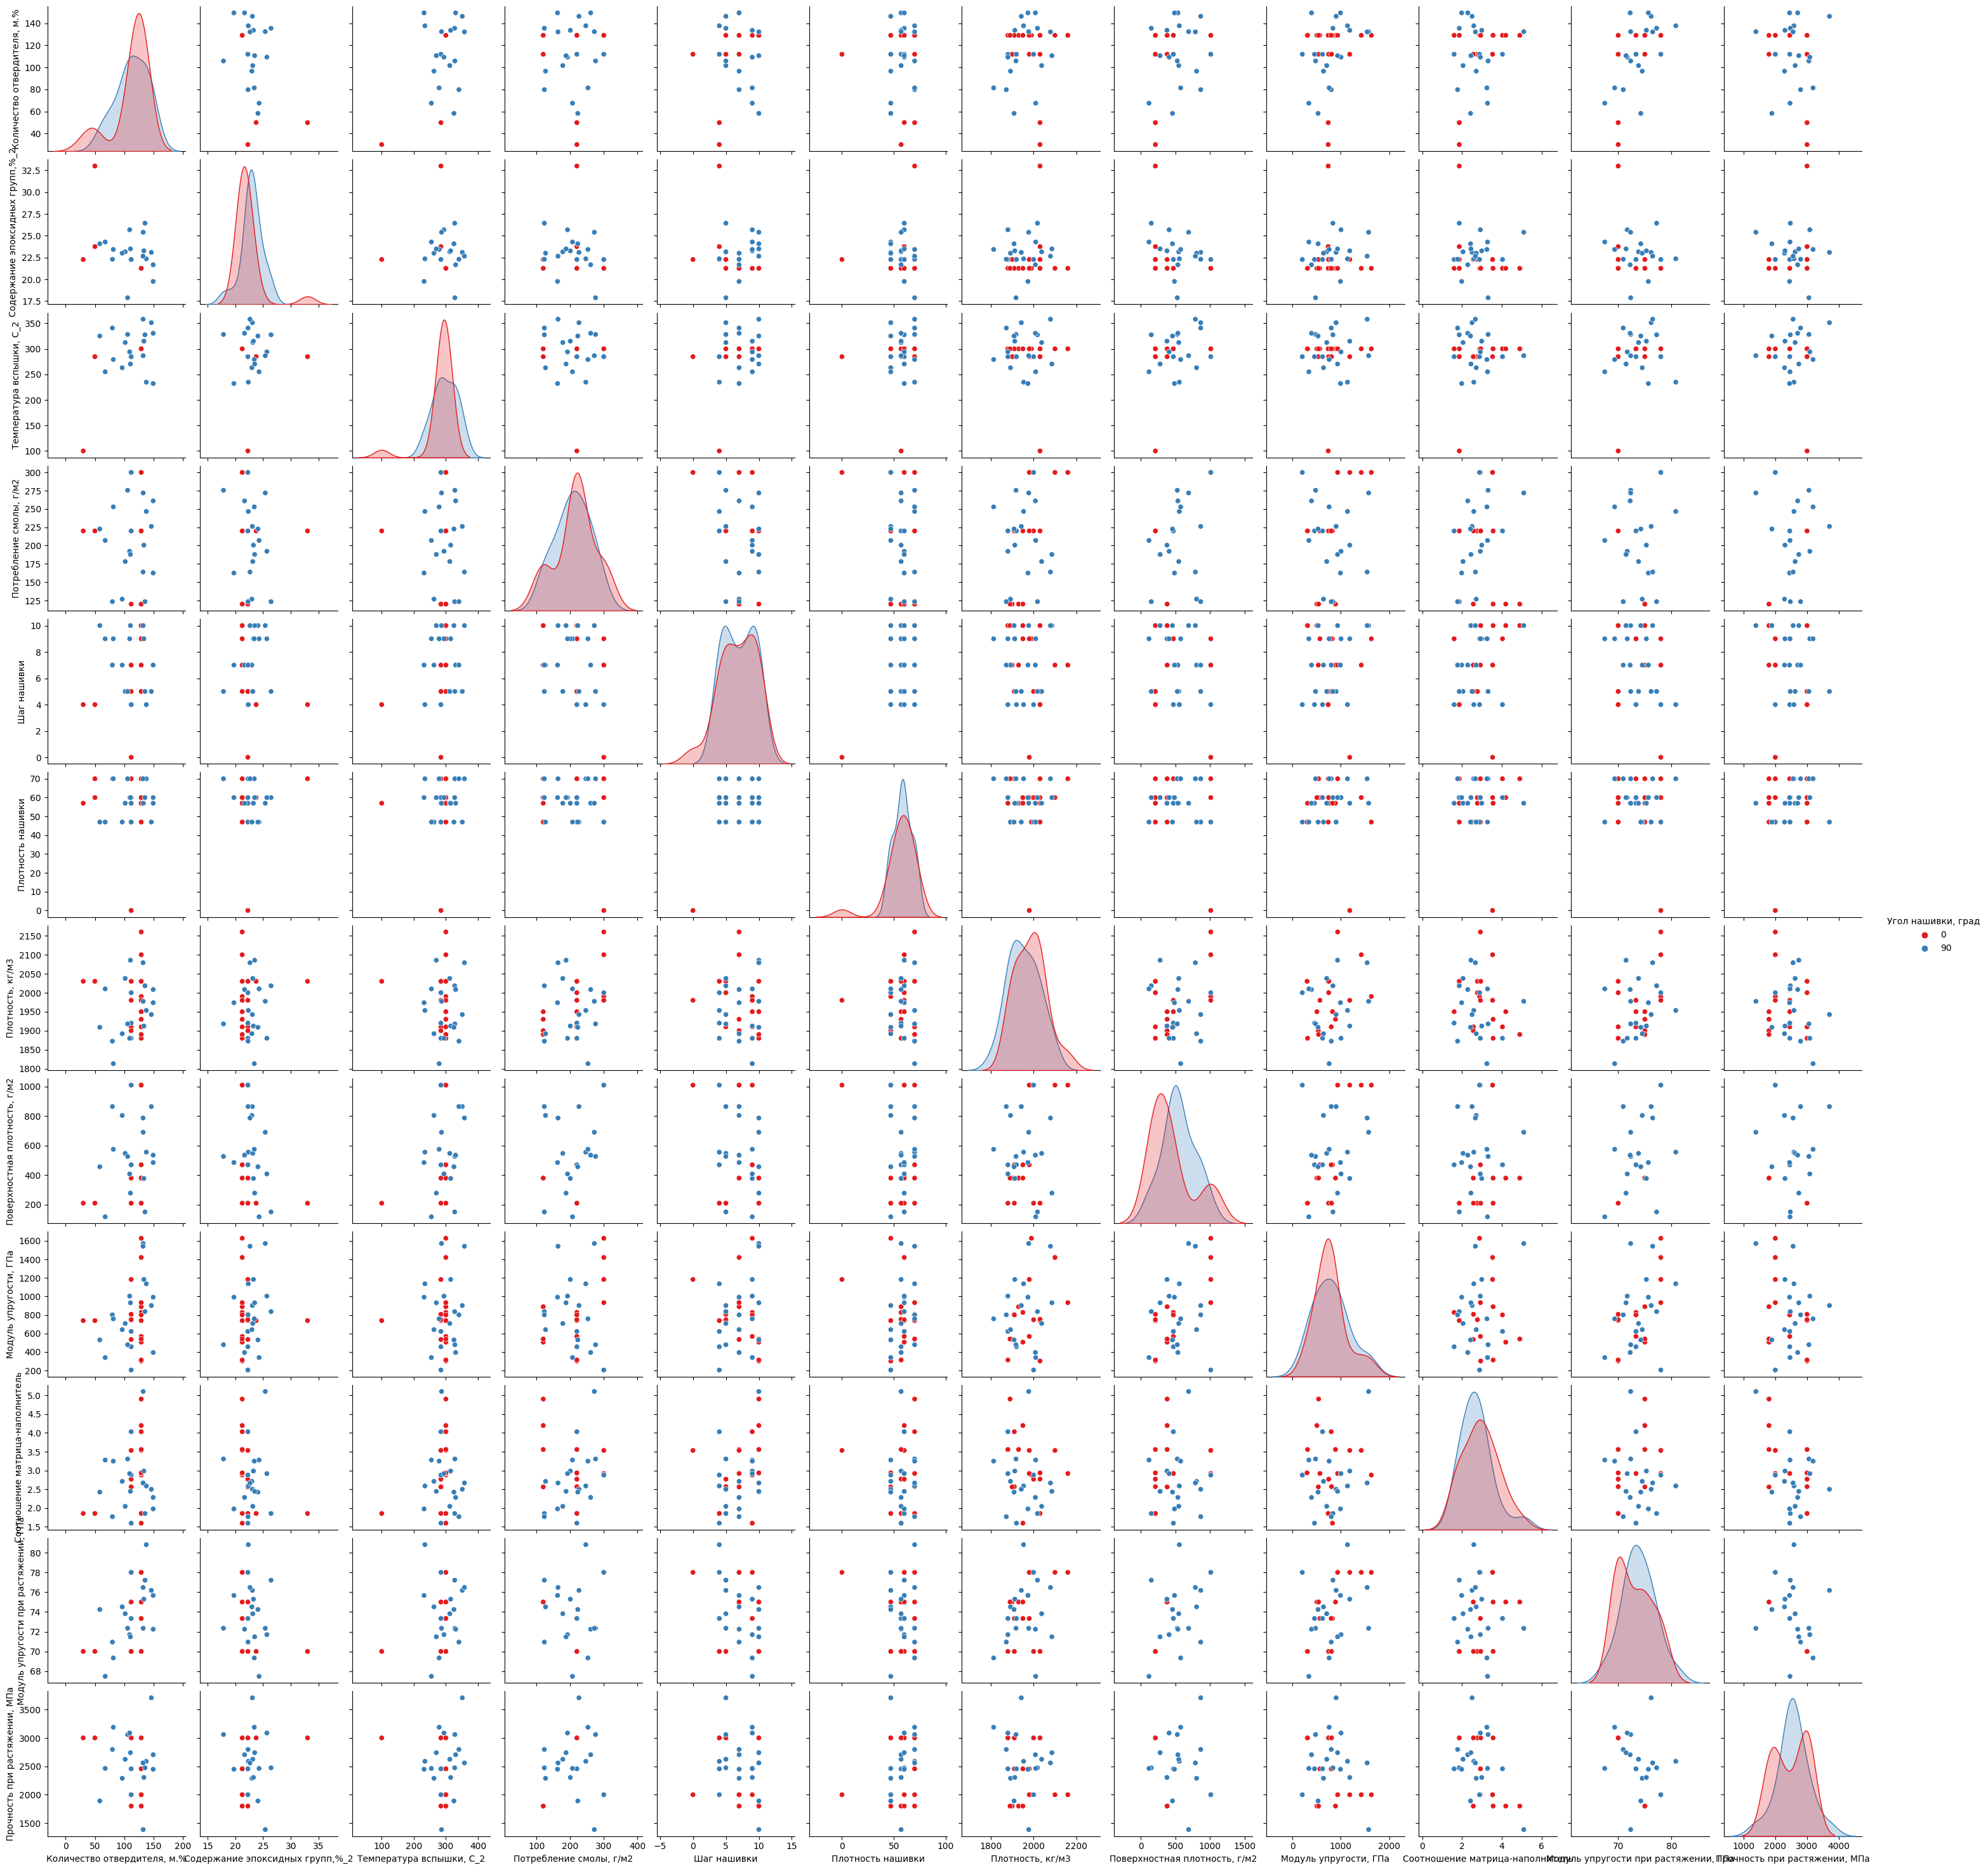

In [14]:
# Попарные графики рассеяния точек

sns.pairplot(data, hue="Угол нашивки, град", palette="Set1")

<Axes: >

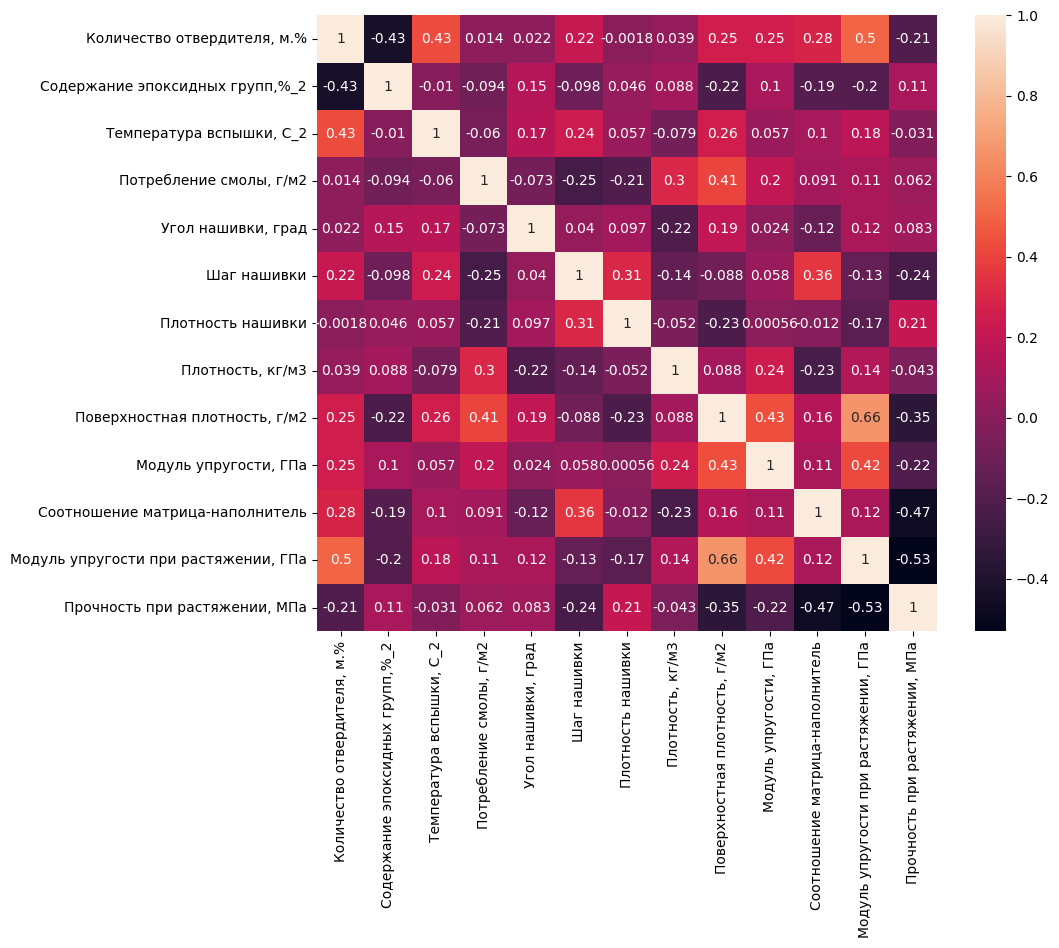

In [7]:
corr_table = data[:40].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, annot=True)

Низкие коэффициенты попарной корреляции между признаками указывают на отсутствие или наличие слабой линейной связи между признаками. Однако низкие коэффициенты корреляции не исключают возможность существования зависимости между признаками. Связь между признаками может быть нелинейной или не монотонной, и не будет отражена в коэффициенте корреляции. Кроме того, могут существовать скрытые зависимости между признаками, которые не учитываются при расчете коэффициента корреляции.  
Поэтому при анализе данных следует использовать не только коэффициент корреляции, но и другие методы, например, методы машинного обучения, для выявления зависимостей между признаками.

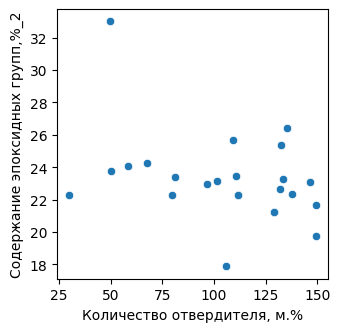

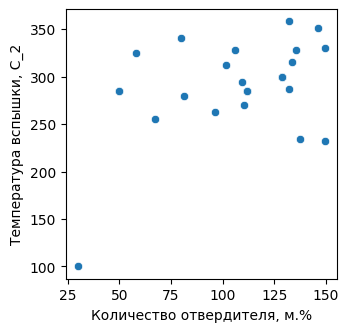

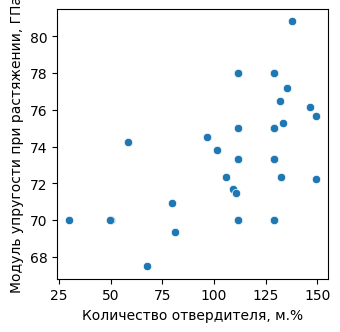

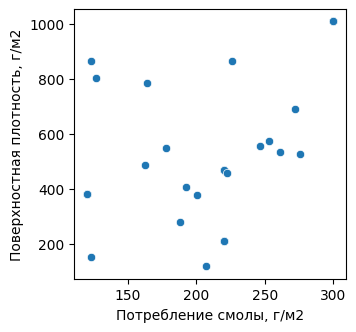

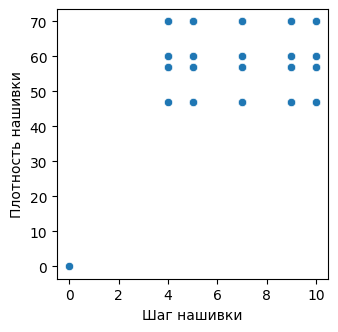

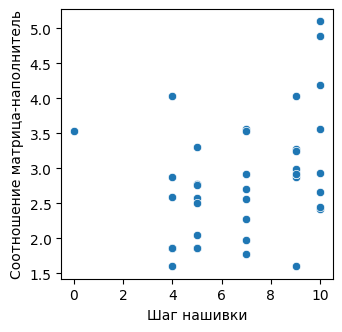

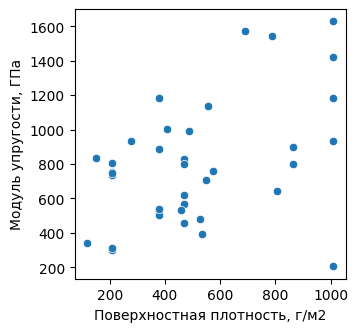

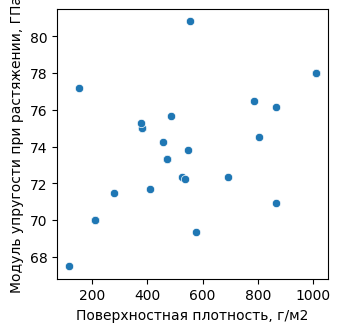

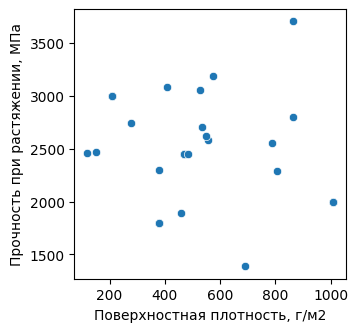

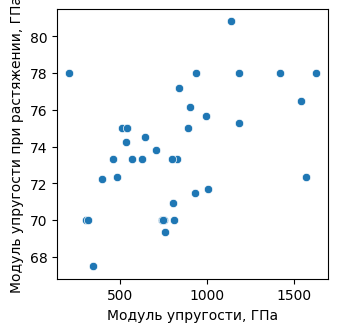

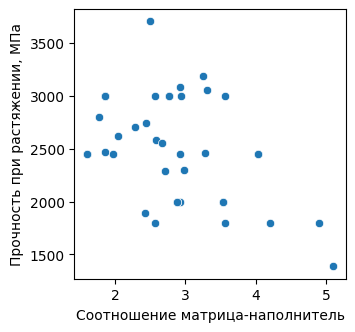

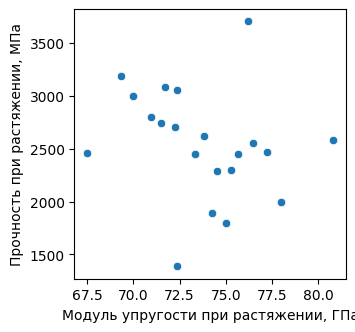

In [8]:
# Несколько важных частных зависимостей посмотреть подробнее

# отбор пар столбцов с корреляцией больше 0.3
corr_pairs = corr_table.unstack().drop_duplicates()
corr_pairs = corr_pairs[(corr_pairs.abs() > 0.3) & (corr_pairs.abs() < 1)]

# построение графиков pairplot для отобранных столбцов
for (col1, col2) in corr_pairs.index:
    plt.figure(figsize=(3.5, 3.5))
    sns.scatterplot(data[:40], x=col1, y=col2)
    plt.show()
    print()


In [19]:
# сделать два класса или нет?
data['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)